In [1]:
%reset
%load_ext autoreload
%autoreload 2

In [32]:
import numpy as np
from functions import CFloader, splt
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from math import sqrt

savedir = "B01/"

In [107]:
# data = CFloader.load_data( "CloudVenetoAnalysis/default_20220514_2" )
data = CFloader.load_data( "AcerAnalysis/default_20220515_20" )
if( len( data ) > 0 ):
    data = data[ np.vectorize( lambda i: i['gamma'] )(data).argsort() ]
else:
    print("No data!")
fitlim = 11

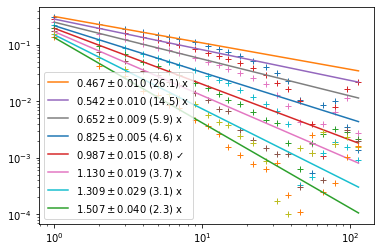

In [108]:
for d in data:
    x = np.array( d['CF_D']['x'] )
    y = np.abs( np.array( d['CF_D']['y'] ) )
    logx = np.log10( x )
    logy = np.log10( y )
    plt.plot( x,  y, '+' )

    def f( x, A, gamma ):
        return - gamma * x + A
    p, pc = curve_fit( f, logx[ x < fitlim ], logy[ x < fitlim ], [ logy[0], d['gamma'] ] )
    y2 = 10 ** f( logx, p[0], p[1] )
    compat = ( abs( p[1] - d['gamma'] ) / sqrt( pc[1,1] ) )

    plt.plot( x, y2, label = fr"${p[1]:.3f} \pm {sqrt(pc[1,1]):.3f}$ ({compat:.1f}) {'✓' if compat < 2 else 'x'}" ) 
    plt.plot( x, f( x, p[0], d['gamma'] ), '--' ) 
    plt.xscale( 'log' )
    plt.yscale( 'log' )
    plt.legend()

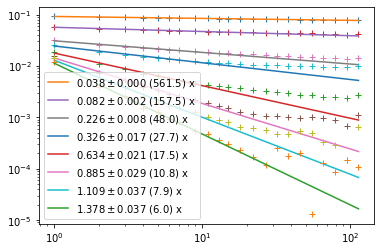

In [109]:
for d in data:
    x = np.array( d['CF_H']['x'] )
    y = np.abs( np.array( d['CF_H']['y'] ) )
    logx = np.log10( x )
    logy = np.log10( y )
    plt.plot( x,  y, '+' )

    def f( x, A, gamma ):
        return - gamma * x + A
    p, pc = curve_fit( f, logx[ x < fitlim ], logy[ x < fitlim ], [ logy[0], d['gamma'] ] )
    y2 = 10 ** f( logx, p[0], p[1] )
    compat = ( abs( p[1] - d['gamma'] ) / sqrt( pc[1,1] ) )

    plt.plot( x, y2, label = fr"${p[1]:.3f} \pm {sqrt(pc[1,1]):.3f}$ ({compat:.1f}) {'✓' if compat < 2 else 'x'}" ) 
    plt.plot( x, f( x, p[0], d['gamma'] ), '--' ) 
    plt.xscale( 'log' )
    plt.yscale( 'log' )
    plt.legend()